In [53]:
'''
This is code for extracting NN features of face image data 
and then fit a linear model to predict attractiveness of a face
Available dataset: TWIN, CHICAGO and MIT
Available NN feature: 'caffeNet','vgg16','vggFace' and 'faceSNN'

BY Linjie Li
Please run this code on guru2 server
'''
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn import linear_model
%matplotlib inline
import os
import random
from os import listdir
from os.path import isfile, join

dataInd = [1,0]
Dataset = ['twin','chicago','mit']
TrainDataset = Dataset[dataInd[0]]
TestDataset = Dataset[dataInd[1]]
MODEL = 'config'
#savePath = '../Result/'+TestDataset+'/'+MODEL
saveTrainPath = '../Result/'+TrainDataset+'/'+MODEL
TrainFeaPath ='../Result/'+TrainDataset+'/configMeasure.csv'
TestFeaPath = '../Result/'+TestDataset +'/configMeasure.csv'

if not os.path.exists(saveTrainPath):
    os.makedirs(saveTrainPath)

TrainFea = pd.read_csv(TrainFeaPath,index_col = 0)
TestFea = pd.read_csv(TestFeaPath,index_col = 0)

origCol = TrainFea.columns.tolist()
origCol = [s.lower() for s in origCol]
TrainFea.columns = [u'luminance_median', u'nose_width', u'nose_length', u'lip_thickness',
       u'face_length', u'r_eye_h', u'l_eye_h', u'eye_height', u'r_eye_w',
       u'l_eye_w', u'eye_width', u'face_width_prom', u'face_width_mouth',
       u'forehead_length', u'pupil_top_r', u'pupil_top_l', u'asymmetry_pupil_top',
       u'pupil_lip_r', u'pupil_lip_l', u'asymmetry_pupil_lip',
       u'bottomlip_chin', u'midcheek_chin_r', u'midcheek_chin_l',
       u'cheeks_avg', u'midbrow_hairline_r', u'midbrow_hairline_l',
       u'face_shape', u'heartshapeness', u'nose_shape', u'lip_fullness',
       u'eye_shape', u'eye_size', u'upper_head_len', u'midface_len',
       u'chin_length', u'forehead_height', u'cheek_height',
       u'cheek_prominence', u'face_roundness', u'fwhr']

origCol = TestFea.columns.tolist()
origCol = [s.lower() for s in origCol]
TestFea.columns = origCol
getCol = origCol[1:]
print TrainFea.columns
TrainFea = TrainFea.loc[:,getCol]

print TestFea.columns
TrainFea = TrainFea.dropna(axis=1, how='any', thresh=None, subset=None, inplace=False)

#TrainFea = TrainFea.as_matrix()
print list(set(TestFea.columns[1:].tolist()) - set(TrainFea.columns.tolist()))
TestFea = TestFea.as_matrix()[:,1:]
numF = TrainFea.shape[1]
print numF

Index([u'luminance_median', u'nose_width', u'nose_length', u'lip_thickness',
       u'face_length', u'r_eye_h', u'l_eye_h', u'eye_height', u'r_eye_w',
       u'l_eye_w', u'eye_width', u'face_width_prom', u'face_width_mouth',
       u'forehead_length', u'pupil_top_r', u'pupil_top_l',
       u'asymmetry_pupil_top', u'pupil_lip_r', u'pupil_lip_l',
       u'asymmetry_pupil_lip', u'bottomlip_chin', u'midcheek_chin_r',
       u'midcheek_chin_l', u'cheeks_avg', u'midbrow_hairline_r',
       u'midbrow_hairline_l', u'face_shape', u'heartshapeness', u'nose_shape',
       u'lip_fullness', u'eye_shape', u'eye_size', u'upper_head_len',
       u'midface_len', u'chin_length', u'forehead_height', u'cheek_height',
       u'cheek_prominence', u'face_roundness', u'fwhr'],
      dtype='object')
Index([u'img_num', u'nose_width', u'nose_length', u'lip_thickness',
       u'face_length', u'eye_height', u'eye_width', u'face_width_prom',
       u'face_width_mouth', u'forehead_length', u'distance_btw_pupils',
  

In [19]:
train_ratingPath = '../Result/'+TrainDataset+'/meanRating.csv'
train_mean_rating = pd.read_csv(train_ratingPath,index_col = 0).as_matrix()[:,0].tolist()
train_mean_rating = map(float, train_mean_rating)
train_mean_rating = np.array(train_mean_rating)

test_ratingPath = '../Result/'+TestDataset+'/meanRating.csv'
test_mean_rating = pd.read_csv(test_ratingPath,index_col = 0).as_matrix()[:,0].tolist()
test_mean_rating = map(float, test_mean_rating)
test_mean_rating = np.array(test_mean_rating)

print 'On the training dataset: '+TrainDataset
baseLine = train_mean_rating.mean()
print 'train mean rating: ', baseLine

# cross validation 
from sklearn import cross_validation
X_train, X_test, y_train, y_test = cross_validation.train_test_split(\
                       TrainFea, train_mean_rating, test_size=0.2, random_state=0)

X_train_hat = X_train[:,:numF]
X_test_hat = X_test[:,:numF]
# Do linear regression on feature_arr and mean_rating
regr = linear_model.Ridge(fit_intercept=True)
# mu = sum(y_train)*1.0/len(y_train)
# sigma = np.std(y_train)
# y_train_whiten = (y_train - mu)/sigma
regr.fit(X_train_hat, y_train)
predicted_rating = regr.predict(X_test_hat)
#predicted_rating = predicted_rating*sigma +mu
# Calculate the mean square error
MSE = np.mean((predicted_rating - y_test) ** 2)

# Returns the coefficient of determination R^2 of the prediction.
variance_score = regr.score(X_test_hat, y_test)

# Calculate the correlation between prediction and actual rating.
cor = np.corrcoef(predicted_rating, y_test)

print 'Correlation: ', cor[0,1]
print 'R^2 score: ',variance_score
print 'num of features: ',numF
print 'MSE: ',MSE

print ''
print 'On the testing dataset: '+TestDataset
test_baseLine = test_mean_rating.mean()
print 'test mean rating: ', test_baseLine
# mu = sum(test_mean_rating)*1.0/len(test_mean_rating)
# sigma = np.std(test_mean_rating)
TestFea_hat = TestFea[:,:numF]
predicted_rating = regr.predict(TestFea_hat)
#predicted_rating = predicted_rating*sigma +mu
# Calculate the mean square error
MSE = np.mean((predicted_rating - test_mean_rating) ** 2)

# Returns the coefficient of determination R^2 of the prediction.
variance_score = regr.score(TestFea_hat, test_mean_rating)

# Calculate the correlation between prediction and actual rating.
cor = np.corrcoef(predicted_rating, test_mean_rating)
print 'Correlation: ', cor[0,1]
print 'R^2 score: ',variance_score
print 'num of features: ',numF
print 'MSE: ',MSE

On the training dataset: chicago
train mean rating:  3.23186626992


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

Into plotting...
[1, 2, 3, 8, 1, 1, 1, 8, 1, 3, 1, 8, 3, 8, 2, 8, 1, 8, 8, 1, 8, 2, 8, 8, 1, 1, 8, 8, 1, 2, 3, 8, 1, 8, 8, 1, 3, 1, 3, 8]
[ 7  1 14  5 11 17 10  5  2 14  3 13 14 13  1  5  8  5  5  4  5 16 13 13 19
 18 13 13 15 16  6  5 20 13 13 12  6  9  6  5]
Finish dendrogram...
Start plotting heatmap...


(array([39, 11, 15,  7, 17, 18, 20, 22, 23, 13, 27, 26, 31,  3, 33, 34, 30,
        12,  9, 38,  2, 36, 29, 21,  1, 14,  6,  5,  4,  8, 19, 10, 16, 24,
        25, 28, 32, 35, 37,  0]),
 array([ 7,  1, 14,  5, 11, 17, 10,  5,  2, 14,  3, 13, 14, 13,  1,  5,  8,
         5,  5,  4,  5, 16, 13, 13, 19, 18, 13, 13, 15, 16,  6,  5, 20, 13,
        13, 12,  6,  9,  6,  5], dtype=int32))

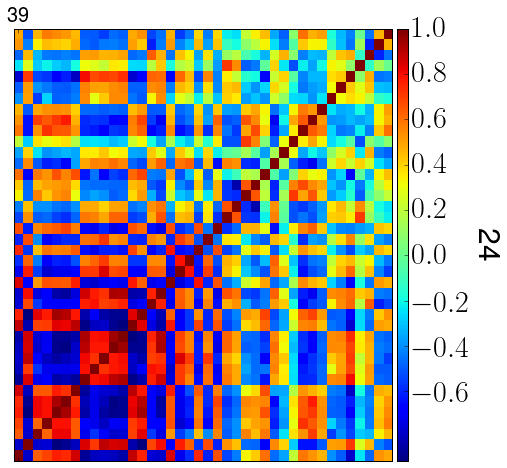

In [19]:
from plotFunc import plotHeatMap
import pandas as pd
%matplotlib inline
p = pd.read_csv('/Users/Olivialinlin/Documents/Github/attractiveness_datamining/linjieCode/code/correlation_array', index_col = 0)
column_name = p.columns.tolist()
data = p.as_matrix()
#print data
cMap='Purples'
plotHeatMap(data, figName = 'reorderedCorrelaionMatrix')

In [26]:
import sys

print sys.path